In [1]:
import pickle
from dnn_app_utils_v3 import *
filename = 'parameters.sav'
loaded_parameters = pickle.load(open(filename, 'rb'))
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [2]:
def predict(X, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    return p

In [13]:
def predict_my_image(my_image):
    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    num_px = 64
    # my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
    fname = "images/" + my_image
    image = np.array(Image.open(fname).resize((num_px, num_px)))
    plt.imshow(image)
    image = image / 255.
    image = image.reshape((1, num_px * num_px * 3)).T
    my_predicted_image = predict(image, loaded_parameters)
    return print ( "The L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


In [19]:
predict_my_image("img.jpg")

The L-layer model predicts a "non-cat" picture.


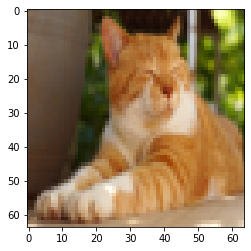

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
num_px = 64
# my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
fname = "images/" + "img.jpg"
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(image, loaded_parameters)
result = classes[int(np.squeeze(my_predicted_image)),].decode("utf-8")

In [31]:
print(result)

non-cat
